# Problem:
You drop a superball from a height of 1.5 meters onto a flat hard surface. It bounces many times, until its
vertical motion stops.

(a) Assume that it loses some constant fraction $f$ of its kinetic energy each time it bounces. (Kinetic energy
$K=\frac{mv^2}{2}$.)

How does the ball’s upwards velocity after a bounce relate to its downwards velocity before the bounce?

(b) If it takes 20 seconds for the ball to stop bouncing, what is $f$?

(c) How could you determine if your assumption in part (a) is a good one?

(d) Will air resistance have any significant effect on your answers? Do a simple estimate to determine the answer.

## Solution

(a) In the absense of any other forces acting on the ball, the kinetic energy $KE$ will be equivalent to the the potential energy $UE$

at time 0. $$U(0)=K(t_1)$$

$$mgh_0=\frac{mv_{Down}^2}{2}\quad\rightarrow\quad\sqrt{2gh_0}=v_{Down}$$

The kinetic energy on the way back up will be equal to the kinetic energy that was achieved just before striking the ground times

the fraction of energy lost

$$KE_{1}(t_1)=KE_{D}(t_1)f$$
$$\frac{mv_1^2}{2}=\frac{mv_D^2}{2}f\quad\rightarrow\quad v_1(t_1)=v_d(t_1)f$$

Since $f$ is constant, we make $\sqrt{f}=f$ with the intention of coming back to this later. 

This is merely to make our lives easier, but it's important to remember explicitly that whatever $f$ in the end, we'll need to find $\sqrt{f}$.

moving forwards, we know that the next bounce will have velocity equal to the velocity of the first bounce times the constant fraction of 

energy lost. $$v_2=v_1f\quad\rightarrow\quad v_2=(v_df)f\quad\rightarrow\quad v_2=v_df^2$$

extrapolating this method to the next bounce... $$v_3=v_2f\quad\rightarrow\quad v_3=v_df^3$$

The pattern is starting to emerge, so my guess is going to be:

$$v_n=v_df^n$$

### Before getting the answer

I encourage you to stop here and try to get the rest of the answers yourself. When originally presented this problem, the hardest part for me was describing
the first part. However, I understand we all think differently, so even if you do continue, I encourage you to stop anytime you think you may fully understand
the problem. 

(b) To start, it'll be best to model $t$ and $v$ before any energy is lost to bouncing. As in, lets get the time it takes the ball to initially strike the ground.

$$v_f=v_0+gt\quad\rightarrow\quad\frac{v_f-v_0}{g}=t\quad\rightarrow\quad\frac{v_d-0}{g}=t_1\quad\Rightarrow\quad t_1=\frac{v_d}{g}$$

Before moving on, we should model the behavior of the ball through time $t_2$

We know that the ball will initally move up after the bounce, being slowed by gravity until it loses all velocity at the point $\sqrt{2gh_0}f$.
if we take up to be the positive direction we can model $v_1(t)$ as such below, by integrating

$$\int_{x_0}^{x_f} dx=\int (v_0+at)dt\quad\rightarrow\quad x_f=x_0+v_0t+\frac{1}{2}at^2$$


Was a bit explicit, but never hurts too much to be a little verbose. Anyways, we'll use this to model the behavior of v(t) as it traverses

through the time it takes till the next bounce.


Text(0.5, 0, 'time')

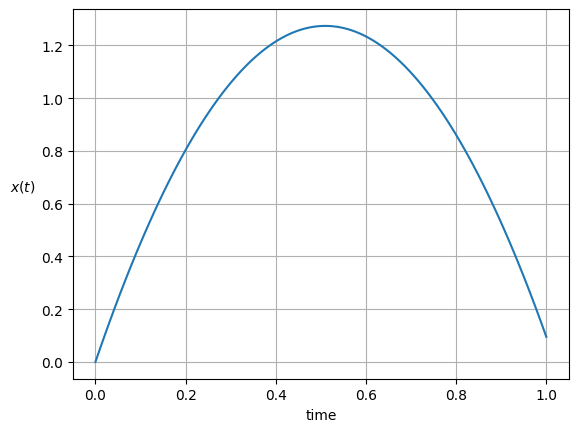

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

def x_one(v_0, t):
    return v_0*t-1/2*9.81*t**2

time=np.linspace(0,1,100)
plt.plot(time, x_one(5, time))
plt.grid()
plt.ylabel(r'$x(t)$', rotation=0, ha='right')
plt.xlabel('time')


(b cont.)

from the graph above we can venture a guess that time it takes to reach it's zenith will be the same as the time it takes to reach the ground again. 

That is to say $v_f=-v_i$. So, getting back to solving for $t_2$ and borrowing from (a) $$v_1=v_df=v_i$$

$$-v_df=v_df-gt_2\quad\Rightarrow\quad t_2=\frac{2v_df}{g}$$

continuing down the line $$t_3=\frac{2v_df^2}{g}$$

the pattern emerging here seems to take the form $$t_n=\frac{2v_df^{n-1}}{g}$$

The question explicitly states that all bouncing, and in this case, all momentum stops at $t_{\to}20$. Which means $K(20)=0$ and $U(20)=0$ 

All energy will have been lost to this factor $f$, and from our pattern above we can imply there exists some $f^k\to0$ at $t_{k+1}$

we can add all of time $t_n$ and explicitly state it converges to 20:

$$t_1+t_2+t_3+...+t_n=20$$

$$\frac{v_d}{g}+\frac{2v_df}{g}+\frac{2v_df^2}{g}+...+\frac{2v_df^{n-1}}{g}=20\quad\Rightarrow\quad 1+2f+2f^2+...+2f^k=\frac{g20}{v_d}$$

### The Geometric series

$$S_k=\sum_{k=0}^{\infty}ar^k=1+r+r^2+...+r^k$$

$$rS_k=r+r^2+r^3+...+r^{k+1}$$

$$(S_k-rS_k)=(1+r+r^2+...+r^k)-(r+r^2+r^3+...+r^{k+1})\quad\rightarrow\quad (1-r)S_k=(1-r^{k+1})\quad\Rightarrow\quad S_k=\frac{1-r^{k+1}}{1-r}$$

As $k\to\infty$, $r\to0$ for $-1\lt r\lt 1$ and the series converges $S_k=\frac{1}{1-r}$

Looking at it from a mathematical perspective, $k$ must converge for our solution to have a finite time, and so $2f$ must be somewhere in the bouds $0\lt 2f\lt 1$

It also makes a bit of physical sense too. If $2f\gt1$ then for each bounce, we'd be adding energy to the system, and the ball would never come to rest.

$$\frac{1}{1-2f}=\frac{g20}{v_d}\quad\Rightarrow\quad f=\frac{1}{2}-\frac{v_d}{g20}\quad\Rightarrow\quad f=\frac{1}{2}-\frac{\sqrt{2gh_0}}{g20}$$

$$ f\approx0.47$$

We can model the behavior of our bouncing ball vs. time by finding the coefficient of restetution. 

$$ e=\sqrt\frac{K(after\;bounce)}{K(before\;bounce)}\quad\rightarrow\quad e=\sqrt\frac{K_if}{K_i}$$

$$e=\sqrt\frac{mgh_0f}{mgh_0}\quad\rightarrow\quad e=\sqrt{f}\quad\Rightarrow\quad e=\sqrt{\sqrt{f}}$$

$$e\approx 0.83$$

This tracks, as most superballs have COR's near 1. While not perfect, a satisfactory enough answer for me. Below I've modeled the motion of the ball and it's energy vs time.

,time,h(t),v(t),E(t)
1990,19.90,0.007987,-0.134552,3.379582e-14
1991,19.91,0.006642,-0.232652,3.379582e-14
1992,19.92,0.004315,-0.330752,3.379582e-14
1993,19.93,0.001008,-0.428852,3.379582e-14
1994,19.94,0.000000,0.355948,2.805053e-14
1995,19.95,0.003559,0.257848,2.805053e-14
1996,19.96,0.006138,0.159748,2.805053e-14
1997,19.97,0.007735,0.061648,2.805053e-14
1998,19.98,0.008352,-0.036452,2.805053e-14
1999,19.99,0.007987,-0.134552,2.805053e-14


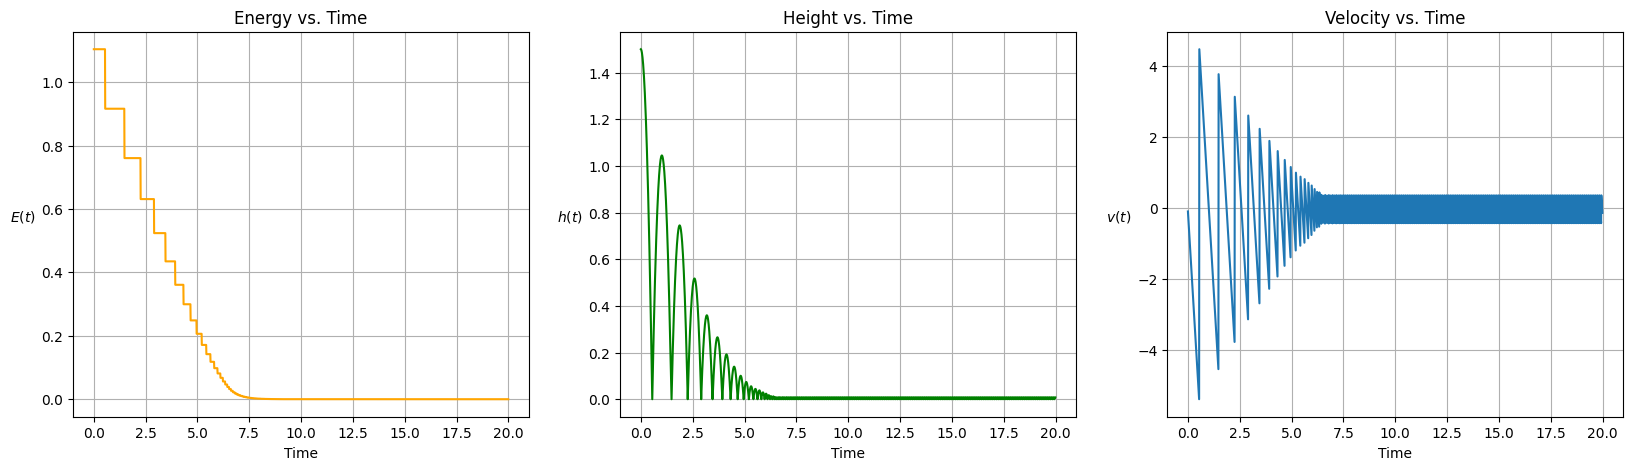

In [52]:
def loss_over_time(n, mass, g, h, f):
    return 1/2*mass*np.sqrt(2*g*h)**2*f**n

def height_time(g, height, time, velocity,
                dt, h_floor, e, t_max):
    data=[]
    n=0
    
    while time<t_max:
        height+=velocity*dt
        #If the ball strikes the ground we take opposite its direction time COR
        #Otherwise we take the standard motion of the ball
        if height<h_floor: height=0.0
        
        velocity=velocity-g*dt if height>h_floor else -velocity*e
        
        if height<=h_floor: n+=1 
        K=m/2*np.sqrt(2*g*1.5)**2*e**n 
        data.append([time, height, velocity, K])
        time+=dt    
    data=np.array(data).transpose()
    return data

m=0.075
g=9.81
h_0=1.5
e=0.83
time=np.linspace(0,20,100)

bouncing=height_time(g, h_0, 0.0, 0.0, 0.01, 0.0, e, time[-1])

fig, (ax1, ax2, ax3)=plt.subplots(1, 3, figsize=(20,5))

ax1.plot(bouncing[0], bouncing[3], color='orange')
ax1.set_xlabel('Time')
ax1.set_ylabel(r'$E(t)$', rotation=0, ha='right')
ax1.grid()
ax1.set_title('Energy vs. Time')
ax2.plot(bouncing[0], bouncing[1], color='green')
ax2.set_xlabel('Time')
ax2.set_ylabel(r'$h(t)$', rotation=0, ha='right')
ax2.grid()
ax2.set_title('Height vs. Time')
ax3.plot(bouncing[0], bouncing[2])
ax3.set_xlabel('Time')
ax3.set_ylabel(r'$v(t)$', rotation=0, ha='right')
ax3.grid()
ax3.set_title('Velocity vs. Time')


data=pd.DataFrame({
    'time':bouncing[0], 
    'h(t)':bouncing[1],
    'v(t)':bouncing[2],
    'E(t)':bouncing[3]
    })

mid=data.shape[0]//2
data.head(2000).tail(10)

As you can see most of the energy in the system is lost within the first five to six seconds. This picture is not wholly accurate, as our signifigant figures in our steps in time only are 2. 

However, this does give a good estimate to the type of behavior we could expect to see with the ball. Notice when modelling this behavior, we have to explicitly tell the computer to reset

the height to zero when going negative. This is solely to help correct our errors.

(c) 

$f$ will always be between 1 and 0. If we take $f^n$ where n is very large, $f\to0$ and $v(t_{n+1})\to0$. As stated above this makes phyisical sense as letting $f\gt1$ will add energy

to the system, and having $f\lt0$ really has no physical meaning, as we're adding negative energy into the system? As done above, simply modeling the behavior should be similar to any

actual data we might gather. (A great way to test this is to replicate the experiment with any ball that has a similar COR)


(d)

$$E_{loss}=F_{drag}h_0=\frac{C_dA\rho_{air}v^2}{2}h_0\approx 0.027J$$

$$K_{up}(t_1)=K_{down}(t_1)f-E_{drag}\approx 0.49J$$

$$1-\frac{K_{up\;drag}}{K_{up\;no\;drag}}\approx 0.06$$

The estimate shows that within the first bounce alone, our ball with have lost an additional 6% of the initial energy. 

So, we can safely assume drag will have a considerable non-negligable effect. This of course is just a rough and rushed estimate. 

If we wanted we could more accurately extend this out to multiple bounces, and modeling $v(t)$ with algorithms given in previous problems.



